In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dogs-vs-cats


In [ ]:
import os

# Define the train and test directories
train_dir = os.path.join(path, 'train')
test_dir = os.path.join(path, 'test')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalization
test_datagen = ImageDataGenerator(rescale=1./255)

# Create train and test generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'   # 2 classes: cat and dog
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)

{'cats': 0, 'dogs': 1}


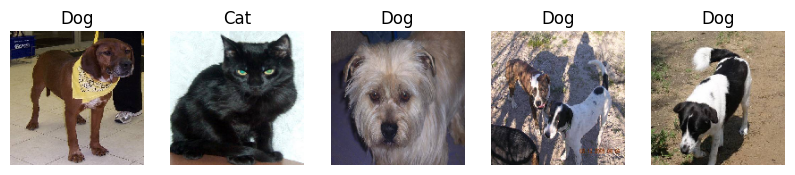

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of images and labels
images, labels = next(train_generator)  # or use test_generator to see test images

# Plot the first 5 images in the batch
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])  # Display the image
    plt.axis('off')  # Turn off axis
    plt.title('Dog' if labels[i] == 1 else 'Cat')  # Title based on label
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Initialize the CNN
model = Sequential()

# Step 1: Convolution Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 2: Second Convolution Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3: Flatten the layers
model.add(Flatten())

# Step 4: Fully connected layer
model.add(Dense(128, activation='relu'))

# Step 5: Output layer (binary classification: cat vs dog)
model.add(Dense(1, activation='sigmoid'))

# Print the model summary to check the layers
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',           # The metric to monitor
    patience=3,                   # Number of epochs to wait before stopping if there's no improvement
    verbose=1,                    # Display a message when early stopping is triggered
    restore_best_weights=True     # Restore the best model weights from the epoch with the best validation loss
)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[early_stopping]
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 86ms/step - accuracy: 0.6044 - loss: 0.7098 - val_accuracy: 0.7378 - val_loss: 0.5226
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7563 - loss: 0.4951 - val_accuracy: 0.7690 - val_loss: 0.4799
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.8360 - loss: 0.3677 - val_accuracy: 0.7949 - val_loss: 0.4581
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.9112 - loss: 0.2215 - val_accuracy: 0.7879 - val_loss: 0.5774
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.9744 - loss: 0.0835 - val_accuracy: 0.7812 - val_loss: 0.7456
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.9916 - loss: 0.0314 - val_accuracy: 0.7825 - val_loss: 0.9533
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.7910 - loss: 0.4676
Test Accuracy: 79.50%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step


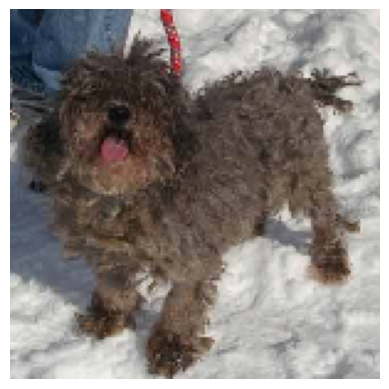

Actual label: Dog
Predicted label: Dog


In [ ]:
import random
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Get a random index from the test generator
index = random.randint(0, test_generator.samples - 1)

# Get the image and its label from the generator
img_path, label = test_generator.filenames[index], test_generator.labels[index]

# Load the image (with the same target size as the model's input size)
img = image.load_img(test_generator.directory + '/' + img_path, target_size=(150, 150))

# Preprocess the image
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Rescale the image

# Make the prediction
prediction = model.predict(img_array)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Print the actual label and predicted label
actual_label = "Dog" if label == 1 else "Cat"
predicted_label = "Dog" if prediction[0] > 0.5 else "Cat"
print(f"Actual label: {actual_label}")
print(f"Predicted label: {predicted_label}")
